In [3]:
import os
import random
from decimal import *

import matplotlib.pyplot as plt

import numpy as np
from scipy import stats
from numpy.linalg import norm

### plots formatting
from matplotlib import rc
from matplotlib.colors import LinearSegmentedColormap
from cycler import cycler


rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino'], 'size':14})
rc('text', usetex=True)
plt.rc('axes', prop_cycle=(cycler('color', ['red', 'gray', 'black', 'blue', 'green'])))#, )))

#import ars
import Bayes_arms

from BayesW_utils import *
from Distributions import *
from Load_data import *


In [2]:
betas = pd.read_table("/home/avillanu/BayesW_data_sim/Weibull.beta", sep=" ", header=None)[1].to_numpy()

In [3]:
betas.var()*200

0.016719388530205517

In [2]:
N =1000

In [3]:
gumbel_dis = stats.gumbel_r(loc=0, scale=1)
w = gumbel_dis.rvs(size=(N,1))

In [12]:
alpha = 10

In [15]:
w1 = -np.log(-np.log(1-np.random.uniform(size=N)))

In [16]:
np.var(w), np.var(w1)

(1.8475891432508738, 1.5361257202118028)

In [23]:
N = 1000
M = 20000
causal = 200

mu = 4.1

alpha = 10
sigma_g = np.pi**2/(6*alpha**2)


b = np.random.normal(0, np.sqrt(sigma_g/causal), size = causal)


markers = np.random.normal(0, 1, (N, M))

beta = np.zeros(M)
index = np.random.choice(np.arange(0,M), causal)

h2 = 0.5

beta[index] = b

g = markers.dot(beta)

gumbel_dis = stats.gumbel_r(loc=0, scale=1)
w = gumbel_dis.rvs(size=N)

log_data = mu + g + w/alpha + np.euler_gamma/alpha


In [34]:
censoring_time = np.random.uniform(0,600, size=N)

cens = np.log(censoring_time)

a = np.where((log_data <= cens) == False, cens, log_data)

In [64]:
b = np.where(isFailure , log_data, cens)

In [37]:
gen_file = "/home/avillanu/GitHub/BayesW/files_sim/Weibull_dense_1000_20000"
fail_file = "files_sim/Weibull_dense_1000_20000.fail"
phen_file = "files_sim/Weibull_dense_1000_20000.phen"

markers = load_genotype(gen_file)
d_fail = load_fail(fail_file)
y_data_log = load_phen(phen_file)

In [38]:
y_data_log[d_fail == 0].var()

1.2026365184267835

In [1]:
hpars_file = "files_sim/Weibull_dense_1000_20000.h2"


In [34]:
gen_file = "/home/avillanu/BayesW_data_sim/t_M10K_N_5K"
fail_file = "/home/avillanu/BayesW_data_sim/Weibull.fail"
phen_file = "/home/avillanu/BayesW_data_sim/Weibull.phen"

markers = load_genotype(gen_file)
d_fail = load_fail(fail_file)
y_data_log2 = load_phen(phen_file)

betas = pd.read_table("/home/avillanu/BayesW_data_sim/Weibull.beta", sep=" ", header=None)[1].to_numpy()

In [36]:
y_data_log2[d_fail == 0].var()

1.1150830051059437

In [12]:
markers.shape,markers.var()

((5000, 10000), 0.30568115024351866)

In [29]:
norm_markers = helpers.normalize_markers(markers)
norm_markers.var()

0.9999999999999978

In [30]:
b = np.zeros(markers.shape[1])
b[np.random.choice(np.arange(1,markers.shape[1]),200)] = betas

In [31]:
g = norm_markers.dot(b)

In [32]:
g.var()

0.016745218162440973

In [37]:
(y_data_log2 - g).var()

0.24540490935169965

In [38]:
epsilon = y_data_log2 -mu - g

In [55]:
np.pi/np.sqrt(6 * np.var(epsilon))

2.5890034204974466

In [39]:
from Distributions_dense import *

In [46]:
pars = {"d_array": d_fail,
"d":d_fail.sum(),
"alpha_zero":0.01,
"kappa_zero":0.01}

/home/avillanu/GitHub/BayesW/Distributions_dense.py:38: RuntimeWarning: divide by zero encountered in log
  return lambda x: (pars["alpha_zero"] + pars["d"] -1)*np.log(x) \


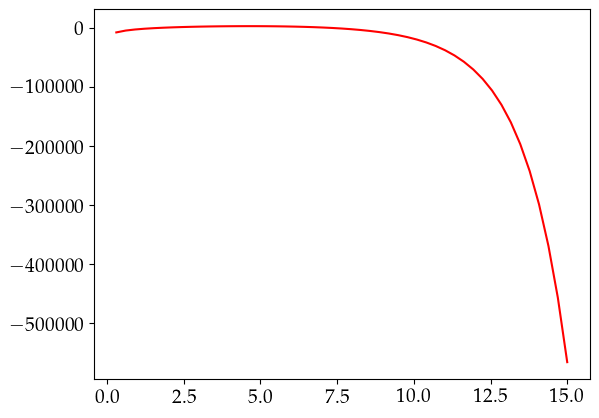

In [53]:
x_vals = np.linspace(0,15)
f = [log_alpha(pars, epsilon)(x) for x in x_vals]
plt.plot(x_vals, f)

In [88]:
gumbel_dis = stats.gumbel_r(loc=0, scale=1)
w = gumbel_dis.rvs(size=(markers.shape[0],1))


In [90]:
log_y = mu + g + w/alpha + np.euler_gamma/alpha

In [91]:
np.var(log_y)

0.019865027067917613

In [43]:
np.var(y_data_log2)/2

0.11347435376914329

In [41]:
np.mean(y_data_log), np.var(y_data_log)

(4.012242035611408, 0.031815035821945684)

In [42]:
np.mean(y_data_log2), np.var(y_data_log2)

(4.000997954279053, 0.22694870753828658)

In [39]:
norm_markers = helpers.normalize_markers(markers)


pars, alpha_ini, sigma_g_ini = init_parameters(n_markers = n_markers,
                                                l_mix = l_mix, 
                                                data = (markers, d_fail, y_data_log) )

mix_comp = []
mu = Parameter(log_mu, dev_log_mu, 
               bounds = (2,10), 
               init_value = np.mean(y_data_log),
               xinit = [0.995, 1, 1.005, 1.01])

alpha = Parameter(log_alpha, dev_log_alpha,
                  bounds = (0, 400),
                  init_value= pars["alpha"],
                  xinit = [0.5, 1, 1.5, 3])

betas = list(np.zeros(n_markers))
for j in range(n_markers):
    betas[j] = Parameter(log_beta, dev_log_beta,
                bounds = (-1,1),
                init_value = 0, xinit= [1,1,1,1])

sigma_g = SimpleParameter(pars["sigma_g"])
    
#mu.now = mu_true
#alpha.now = alpha_true

epsilon = y_data_log - mu.now
np.set_printoptions(precision=3)

with open("epsilon.txt","w") as f:
    print(iter, "\t", 'nan', "\t", end='', file=f)
    np.savetxt(f, epsilon )


print("\t".join(["0", str(mu.now), str(sigma_g.now), str(alpha.now), "h2", "0", "0", "0"]))
print(pars["pi_L"])


0	4.000997954279053	0.0011349705317977926	2.6919497999407764	h2	0	0	0
[0.99  0.003 0.003 0.003]


In [40]:
I2 = []
SI2 = []
I1 = []
SI1 = []

for j in range(n_markers):
    idx = np.argwhere(markers[:,j] == 2).flatten()
    I2.append(idx)
    SI2.append(idx.shape[0])

    idx = np.argwhere(markers[:,j] == 1).flatten()
    I1.append(idx)
    SI1.append(idx.shape[0])

In [42]:
mave = np.zeros(n_markers)
mstd = np.zeros(n_markers)
sum_failure = np.zeros(n_markers)
temp_fail_sum = d_fail.sum()
Ntot = markers.shape[0]
for i in range(n_markers):
    mave[i] = (SI1[i] + 2*SI2[i]) / Ntot
    tmp1 = SI1[i] * (1-mave[i])**2
    tmp2 = SI2[i] * (2-mave[i])**2
    tmp0 = (Ntot - SI1[i] - SI2[i]) * (0 - mave[i])**2
    mstd[i] = np.sqrt((tmp0+tmp1+tmp2)/(Ntot - 1))

    temp_sum = d_fail[I1[i]].sum() + 2*d_fail[I2[i]].sum()
    sum_failure[i] = (temp_sum - mave[i] *temp_fail_sum)/mstd[i]

In [50]:
np.unique(markers)

array([0, 1, 2])

In [46]:
sum_failure

array([ 2.586e+01,  4.122e+01, -2.265e+01,  2.630e+01, -2.886e+00,
       -1.806e+01, -3.067e+01,  2.907e+01,  2.766e+01, -6.285e+00,
        2.019e+01, -2.324e+01, -1.742e+01,  2.161e+01,  1.990e+01,
        5.332e+01, -8.815e+00,  2.448e+01, -4.948e+00,  2.258e+01,
       -4.030e+00, -1.061e-01, -1.677e+00,  8.606e+00, -1.021e+01,
        1.877e+01, -3.325e+01,  8.462e+00, -3.305e+01,  2.580e+01,
        9.918e+00, -2.239e+01,  5.853e+00,  8.043e-01, -3.234e+01,
       -1.456e+01,  9.074e+00,  1.986e+01, -8.966e+00,  1.982e+01,
        1.741e+01, -4.744e+00, -7.091e+00,  5.928e+00, -3.785e+01,
        3.045e+01, -8.184e+00,  1.518e+01,  2.437e+01, -3.023e+01,
       -2.221e+00, -1.543e+01,  2.729e+01, -1.661e+01,  1.805e+01,
        2.278e+01, -1.980e+01, -5.534e+00,  2.161e+01, -1.121e+01,
       -9.462e+00,  2.394e+01,  5.716e+00,  3.211e+01,  2.865e-01,
       -2.950e+00, -4.336e+01,  2.183e+01, -1.488e+01, -1.113e+01,
        6.352e+00, -2.096e+01,  5.118e+00, -1.937e+01,  8.257e

In [24]:
i = 3
(temp_sum - mave[i] *temp_fail_sum)/mstd[i]

-1.451492762878792

In [13]:
mstd

array([0.724, 0.708, 0.651, 0.689, 0.694, 0.697, 0.732, 0.731, 0.732,
       0.658, 0.703, 0.674, 0.689, 0.764, 0.724, 0.731, 0.671, 0.758,
       0.717, 0.664, 0.71 , 0.744, 0.73 , 0.689, 0.742, 0.715, 0.674,
       0.691, 0.708, 0.71 , 0.722, 0.765, 0.79 , 0.724, 0.711, 0.695,
       0.767, 0.704, 0.724, 0.666, 0.646, 0.664, 0.685, 0.696, 0.771,
       0.674, 0.642, 0.74 , 0.706, 0.722, 0.682, 0.717, 0.642, 0.677,
       0.737, 0.772, 0.703, 0.742, 0.657, 0.696, 0.703, 0.722, 0.732,
       0.712, 0.686, 0.651, 0.702, 0.714, 0.665, 0.683, 0.724, 0.751,
       0.696, 0.695, 0.725, 0.665, 0.696, 0.745, 0.789, 0.689, 0.732,
       0.672, 0.724, 0.724, 0.706, 0.681, 0.662, 0.758, 0.707, 0.703,
       0.655, 0.68 , 0.764, 0.659, 0.658, 0.682, 0.765, 0.689, 0.725,
       0.724, 0.724, 0.756, 0.769, 0.722, 0.724, 0.677, 0.778, 0.732,
       0.646, 0.672, 0.714, 0.718, 0.674, 0.651, 0.677, 0.761, 0.735,
       0.73 , 0.703, 0.71 , 0.655, 0.664, 0.691, 0.724, 0.694, 0.758,
       0.695, 0.714,

In [9]:
    
#clear_output(wait=False)
#print('it: {}/{}'.format(it+1,maxit))

    
pars["mu"] = mu.now
epsilon = epsilon + mu.now
x = mu.sample_posterior(pars, epsilon, bounds = (0.8*mu.now, 1.2*mu.now))

epsilon = epsilon - mu.now

x = alpha.sample_posterior(pars, epsilon)
pars["alpha"] = alpha.now


vi = calculate_exp_epsilon(pars, epsilon)
print("ini", "\t", vi.T)

pars["marginal_likelihoods"][0] = pars["pi_L"][0] * np.sqrt(np.pi)
pars["v"] = np.ones(pars["l_mix"])


for j in range(10):
    
    pars = prepare_pars_for_beta(pars, j)
    beta = betas[j]

    if beta.now != 0:
        epsilon = epsilon + norm_markers[:,j]*beta.now

    vi = calculate_exp_epsilon(pars, epsilon)
    
    print("ini", "\t", vi.T)
    

    partial_sums = compute_partial_sums(vi, I1[j], I2[j])

    #
    # 
    # print(it, "\t", j, "\t", partial_sums)
    p_uni = np.random.uniform()


    pars["marginal_likelihoods"] = marginal_likelihood_vec_calc(pars, vi, quad_points, norm_markers[:,j] )
    print(j, "\t", pars["marginal_likelihoods"])

    #print(pars["marginal_likelihoods"])
    
    prob_acum = pars["marginal_likelihoods"][0]/pars["marginal_likelihoods"].sum()
    
    for k in range(pars["l_mix"]):
        if p_uni <= prob_acum:

            if k == 0:
                beta.update(0)
                pars["v"][k] += 1
                pars["mixture_component"][j] = k
            
            else:
                pars["mixture_C"] = pars["Ck"][k-1]
                safe_limit = helpers.calculate_safe_limit(pars)

                beta.sample_posterior(pars, partial_sums, 
                                        bounds = (beta.now - safe_limit, beta.now + safe_limit),
                                        xinit = [beta.now - safe_limit/10 , beta.now,  beta.now + safe_limit/20, beta.now + safe_limit/10],
                                        dometrop = 1)

                pars["v"][k] +=1
                pars["mixture_component"][j] = k

                epsilon = epsilon - norm_markers[:,j]*beta.now
            
            
            break

        else:
            if k + 1 == pars["l_mix"] - 1:
                prob_acum = 1
            else:
                prob_acum += pars["marginal_likelihoods"][k+1]/pars["marginal_likelihoods"].sum()
                

sigma_g.sample_posterior(sigma_g_func(betas, pars))
pars["sigma_g"] = sigma_g.now

#print(sigma_g.now)

pars["pi_L"] = np.random.dirichlet(pars["v"])
pars["sqrt_2Ck_sigmaG"] = np.sqrt(2*pars["sigma_g"])

mix_comp.append(pars["v"])

ini 	 [0.297 0.388 0.537 1.1   0.254 0.4   0.475 0.806 0.345 0.254 2.645 1.037
 0.371 0.423 0.439 0.282 0.203 7.202 0.578 0.566 0.598 0.461 0.678 0.797
 0.177 1.181 2.221 0.376 0.366 0.424 0.515 0.285 0.372 2.474 0.284 0.366
 0.817 2.057 6.58  0.388 0.44  0.368 0.415 0.485 0.551 2.601 0.233 0.876
 0.313 0.512 1.675 0.17  0.499 1.251 0.324 0.314 0.92  0.31  0.447 0.521
 0.146 0.404 0.47  0.45  0.285 0.546 0.953 0.245 0.522 1.412 0.36  0.256
 0.484 1.377 1.616 0.818 0.884 0.242 0.188 0.647 0.875 0.341 0.485 0.403
 0.599 1.179 0.674 3.054 0.294 0.15  0.866 0.564 1.988 0.786 0.833 0.334
 0.259 0.168 0.283 0.296]
ini 	 [0.297 0.388 0.537 1.1   0.254 0.4   0.475 0.806 0.345 0.254 2.645 1.037
 0.371 0.423 0.439 0.282 0.203 7.202 0.578 0.566 0.598 0.461 0.678 0.797
 0.177 1.181 2.221 0.376 0.366 0.424 0.515 0.285 0.372 2.474 0.284 0.366
 0.817 2.057 6.58  0.388 0.44  0.368 0.415 0.485 0.551 2.601 0.233 0.876
 0.313 0.512 1.675 0.17  0.499 1.251 0.324 0.314 0.92  0.31  0.447 0.521
 0.146 0.404 